In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 1.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search microsoft/deberta-base, learning rate 1e-05, focal loss gamma 2


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/472 [00:00<?, ? examples/s]

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.bias', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.7396	Val Loss:	1.0969	Accuracy:	0.3025	F1:	0.1548
2 / 30: Train Loss:	0.7253	Val Loss:	1.0737	Accuracy:	0.3361	F1:	0.1985
3 / 30: Train Loss:	0.6123	Val Loss:	0.8639	Accuracy:	0.6471	F1:	0.6288
4 / 30: Train Loss:	0.4194	Val Loss:	0.7393	Accuracy:	0.7143	F1:	0.7053
5 / 30: Train Loss:	0.2938	Val Loss:	0.6938	Accuracy:	0.6891	F1:	0.6769
6 / 30: Train Loss:	0.2212	Val Loss:	0.6195	Accuracy:	0.7563	F1:	0.7521
7 / 30: Train Loss:	0.1706	Val Loss:	0.5925	Accuracy:	0.7815	F1:	0.7778
8 / 30: Train Loss:	0.1083	Val Loss:	0.5678	Accuracy:	0.8067	F1:	0.8066
9 / 30: Train Loss:	0.0811	Val Loss:	0.5829	Accuracy:	0.7983	F1:	0.7985
10 / 30: Train Loss:	0.0549	Val Loss:	0.5640	Accuracy:	0.8151	F1:	0.8151
11 / 30: Train Loss:	0.0392	Val Loss:	0.5755	Accuracy:	0.7899	F1:	0.7839
12 / 30: Train Loss:	0.0254	Val Loss:	0.6362	Accuracy:	0.7647	F1:	0.7620
13 / 30: Train Loss:	0.0128	Val Loss:	0.5640	Accuracy:	0.8067	F1:	0.8070
No improvement for 3 epochs. Stopping early.
best (higgest m

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.bias', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3332	Val Loss:	1.0967	Accuracy:	0.3025	F1:	0.1548
2 / 30: Train Loss:	0.3293	Val Loss:	1.0912	Accuracy:	0.5462	F1:	0.4357
3 / 30: Train Loss:	0.3202	Val Loss:	1.0886	Accuracy:	0.5630	F1:	0.4485
4 / 30: Train Loss:	0.2993	Val Loss:	0.9287	Accuracy:	0.5042	F1:	0.4608
5 / 30: Train Loss:	0.1988	Val Loss:	0.8184	Accuracy:	0.7227	F1:	0.7240
6 / 30: Train Loss:	0.1352	Val Loss:	0.7311	Accuracy:	0.7563	F1:	0.7572
7 / 30: Train Loss:	0.1071	Val Loss:	0.6874	Accuracy:	0.7479	F1:	0.7423
8 / 30: Train Loss:	0.0681	Val Loss:	0.6546	Accuracy:	0.7731	F1:	0.7641
9 / 30: Train Loss:	0.0426	Val Loss:	0.6249	Accuracy:	0.8067	F1:	0.8088
10 / 30: Train Loss:	0.0254	Val Loss:	0.5914	Accuracy:	0.8151	F1:	0.8129
11 / 30: Train Loss:	0.0176	Val Loss:	0.5898	Accuracy:	0.7983	F1:	0.7935
12 / 30: Train Loss:	0.0100	Val Loss:	0.5804	Accuracy:	0.7983	F1:	0.7947
13 / 30: Train Loss:	0.0070	Val Loss:	0.5692	Accuracy:	0.7983	F1:	0.7947
No improvement for 3 epochs. Stopping early.
best (higgest m

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.bias', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0688	Val Loss:	1.0968	Accuracy:	0.3025	F1:	0.1558
2 / 30: Train Loss:	0.0651	Val Loss:	1.0763	Accuracy:	0.4202	F1:	0.3441
3 / 30: Train Loss:	0.0611	Val Loss:	1.0851	Accuracy:	0.6134	F1:	0.5208
4 / 30: Train Loss:	0.0568	Val Loss:	1.0428	Accuracy:	0.5966	F1:	0.5889
5 / 30: Train Loss:	0.0406	Val Loss:	0.8847	Accuracy:	0.7311	F1:	0.7399
6 / 30: Train Loss:	0.0239	Val Loss:	0.8033	Accuracy:	0.7899	F1:	0.7926
7 / 30: Train Loss:	0.0148	Val Loss:	0.7644	Accuracy:	0.7731	F1:	0.7683
8 / 30: Train Loss:	0.0114	Val Loss:	0.7230	Accuracy:	0.7647	F1:	0.7585
9 / 30: Train Loss:	0.0098	Val Loss:	0.7115	Accuracy:	0.7647	F1:	0.7523
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.71      0.76      0.73        38
oversimplification       0.96      0.75      0.84        36
slothful induction       0.76      0.84      0.80        45

          accuracy    

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.bias', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0032	Val Loss:	1.0976	Accuracy:	0.4538	F1:	0.3572
2 / 30: Train Loss:	0.0027	Val Loss:	1.0972	Accuracy:	0.3025	F1:	0.1548
3 / 30: Train Loss:	0.0026	Val Loss:	1.0968	Accuracy:	0.3866	F1:	0.3043
4 / 30: Train Loss:	0.0026	Val Loss:	1.0932	Accuracy:	0.5546	F1:	0.5322
5 / 30: Train Loss:	0.0023	Val Loss:	1.0531	Accuracy:	0.6134	F1:	0.6124
6 / 30: Train Loss:	0.0020	Val Loss:	1.0524	Accuracy:	0.5882	F1:	0.4791
7 / 30: Train Loss:	0.0017	Val Loss:	1.0220	Accuracy:	0.6303	F1:	0.5815
8 / 30: Train Loss:	0.0012	Val Loss:	0.8864	Accuracy:	0.7815	F1:	0.7812
9 / 30: Train Loss:	0.0016	Val Loss:	0.9882	Accuracy:	0.6387	F1:	0.5645
10 / 30: Train Loss:	0.0012	Val Loss:	0.9814	Accuracy:	0.7311	F1:	0.7318
11 / 30: Train Loss:	0.0008	Val Loss:	0.8991	Accuracy:	0.7479	F1:	0.7406
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.73      0.71      0.72        

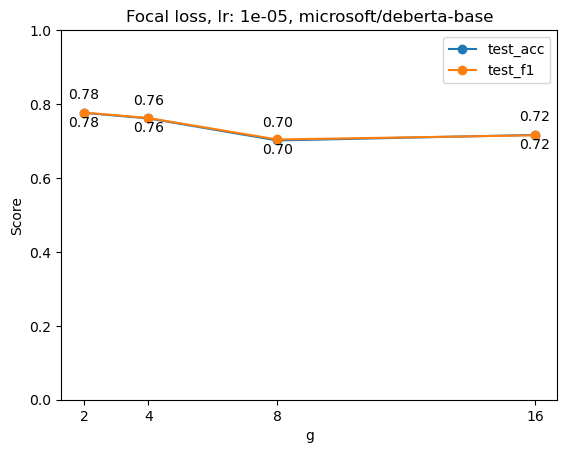

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f